<IPython.core.display.Javascript object>


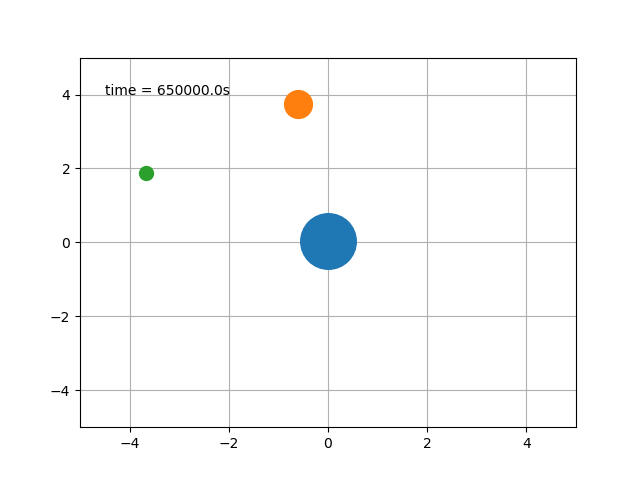

In [5]:
% matplotlib notebook

import numpy as np
import scipy.integrate as integrate
import matplotlib.animation as animation

d = 3.844e08 # meters
T = 27.322 * 24. * 3600. # seconds
omega = 2.*np.pi/T
m_earth = 5.976e24 # kilograms
m_moon = 7.35e22 # kilograms
#m_moon = 0
G = 6.67e-11 # N m^2 / kg
# Set up the motion of the moon
def moon_position(t):
    r_moon = m_earth / (m_moon + m_earth) * d
    phi_moon = omega * t
    x_moon = r_moon * np.cos(phi_moon)
    y_moon = r_moon * np.sin(phi_moon)
    return (x_moon, y_moon)
    
# Set up the motion of the earth
def earth_position(t):
    r_earth = m_moon / (m_moon + m_earth) * d
    phi_earth = omega*t + 2.*np.pi
    x_earth = r_earth * np.cos(phi_earth)
    y_earth = r_earth * np.sin(phi_earth)
    return (x_earth, y_earth)

def derivs(state, t):
    x = state[0]
    y = state[2]
    out = np.zeros_like(state)
    (x_E, y_E) = earth_position(t)
    (x_M, y_M) = moon_position(t)
    d_E = sqrt(pow(x-x_E, 2) + pow(y-y_E, 2))
    d_M = sqrt(pow(x-x_M, 2) + pow(y-y_M, 2))
    
    out[0] = state[1]
    out[1] = -G*m_earth*(x-x_E)/pow(d_E,3) - G*m_moon*(x-x_M)/pow(d_M,3)
    out[2] = state[3]
    out[3] = -G*m_earth*(y-y_E)/pow(d_E,3) - G*m_moon*(y-y_M)/pow(d_M,3)
    return out

# create a time array
dt = 50000
time_interval = np.arange(0.0, 2*T, dt)
earth_positions = []
moon_positions = []

# state with 4 elements
# (x, v_x, y, v_y)_satellite
#state = (2e8, 0, 0, 1.5e3) # Earth orbit
state = (2e8, 0, 0, 1.7e3) # Moon landing at 3.5e6 s


satellite_positions = integrate.odeint(derivs, state, time_interval)
#print(satellite_positions)

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5., 5.), ylim=(-5., 5.))
ax.grid()

earth_marker, = ax.plot([], [], 'o-', markersize=40)
moon_marker, = ax.plot([], [], 'o-', markersize=20)
satellite_marker, = ax.plot([], [], 'o-', markersize=10)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

itime = 0
for time in time_interval:
    earth_positions.append(earth_position(time))
    moon_positions.append(moon_position(time))

def init():
    earth_marker.set_data([], [])
    moon_marker.set_data([], [])
    satellite_marker.set_data([], [])
    time_text.set_text('')
    return earth_marker, moon_marker, time_text

def animate(i):
    earth_marker.set_data(earth_positions[i][0]/100000000, earth_positions[i][1]/100000000)
    moon_marker.set_data(  moon_positions[i][0]/100000000,  moon_positions[i][1]/100000000)
    satellite_marker.set_data(satellite_positions[i,0]/100000000, satellite_positions[i,2]/100000000)
    time_text.set_text(time_template % (i*dt))
    return earth_marker, moon_marker, time_text

ani = matplotlib.animation.FuncAnimation(fig, animate, np.arange(1, len(time_interval)),
                                         interval=200, blit=True, init_func=init)